## Desafio Hackathon TI - Curitiba


### 1. Identificao do problema a resolver

In [ ]:
# Analisar as variações na qualidade do ar em metrópole asiática através do comportamento dos poluentes particulados PM2.5 e PM10
# Variaveis a serem trabalhadas: Year, Month, PM2.5, PM10

### 2. Preparacação e exploração dos dados

In [1]:
# Importar as biblioticas para utilizacao no desafio
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime, timedelta

import glob
import os

In [2]:
# Importar e concatenar os arquivos
path = r'C:/Users/HM/Desktop/Hackathon_TI/PRSA_Data_20130301-20170228'     # caminho do diretorio
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

dframe = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
dframe = pd.concat(list_)

cols = ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
dframe = dframe[cols]

dframe.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
#Cria uma cópia do dframe
dframe_copy = dframe.copy()

In [4]:
dframe_copy.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [6]:
dframe_copy.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [7]:
dframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
No         420768 non-null int64
year       420768 non-null int64
month      420768 non-null int64
day        420768 non-null int64
hour       420768 non-null int64
PM2.5      412029 non-null float64
PM10       414319 non-null float64
SO2        411747 non-null float64
NO2        408652 non-null float64
CO         400067 non-null float64
O3         407491 non-null float64
TEMP       420370 non-null float64
PRES       420375 non-null float64
DEWP       420365 non-null float64
RAIN       420378 non-null float64
wd         418946 non-null object
WSPM       420450 non-null float64
station    420768 non-null object
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [8]:
# Resumo de valores missing por coluna - ANTES
dframe_copy.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [9]:
# Resumo da coluna PM2.5 (antes de tratar valores missing)
dframe_copy['PM2.5'].describe()

count    412029.000000
mean         79.793428
std          80.822391
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         999.000000
Name: PM2.5, dtype: float64

In [10]:
# Resumo da coluna PM10 (antes de tratar valores missing)
dframe_copy['PM10'].describe()

count    414319.000000
mean        104.602618
std          91.772426
min           2.000000
25%          36.000000
50%          82.000000
75%         145.000000
max         999.000000
Name: PM10, dtype: float64

In [11]:
# Inserir valores missing
dframe_copy['PM2.5'].fillna(dframe_copy['PM2.5'].median(), inplace=True)
dframe_copy['PM10'].fillna(dframe_copy['PM10'].median(), inplace=True)

In [12]:
# Resumo de valores missing por coluna - DEPOIS
dframe_copy.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5          0
PM10           0
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [13]:
# Resumo da coluna PM2.5 (depois de tratar valores missing)
dframe_copy['PM2.5'].describe()

count    420768.000000
mean         79.278489
std          80.056799
min           2.000000
25%          21.000000
50%          55.000000
75%         109.000000
max         999.000000
Name: PM2.5, dtype: float64

In [14]:
# Resumo da coluna PM10 (depois de tratar valores missing)
dframe_copy['PM10'].describe()

count    420768.000000
mean        104.256193
std          91.108745
min           2.000000
25%          36.000000
50%          82.000000
75%         144.000000
max         999.000000
Name: PM10, dtype: float64

In [15]:
# Resumo da coluna TEMP (depois de tratar valores missing)
dframe_copy['TEMP'].describe()

count    420370.000000
mean         13.538976
std          11.436139
min         -19.900000
25%           3.100000
50%          14.500000
75%          23.300000
max          41.600000
Name: TEMP, dtype: float64

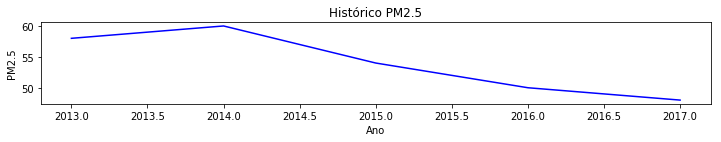

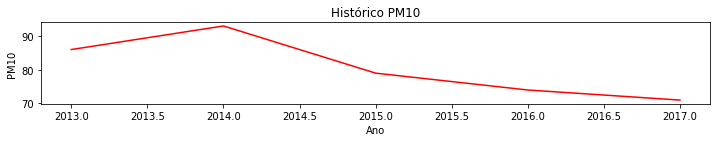

In [16]:
# Analisar histórico de PM2.5 e PM10 ao longo dos anos de 2013 a 2017
# 2014, ano que teve maior pico histórico de emissão de particulas e vai diminuindo com o passar dos anos
# PM2.5 variando de 50 a 60, particulas menores que 2.5 micrômetros
# PM10 variando de 70 a 90, particulas menores que 10 micrômetros

df_year1 = dframe_copy[['year', 'PM2.5']].groupby(['year']).median()
df_year2 = dframe_copy[['year', 'PM10']].groupby(['year']).median()

fig,ax1 = plt.subplots(figsize=(12,1.5))
fig,ax2 = plt.subplots(figsize=(12,1.5))

ax1.plot(df_year1, color = 'blue')
ax2.plot(df_year2, color = 'red')

ax1.set_title('Histórico PM2.5')
ax1.set_xlabel('Ano')
ax1.set_ylabel('PM2.5')

ax2.set_title('Histórico PM10')
ax2.set_xlabel('Ano')
ax2.set_ylabel('PM10')

plt.show()

In [17]:
# Filtro dos anos de 2014 e 2016 para comparação das emissões de particulas.
# Ano de 2017 não foi considerado, pois constava apenas 2 meses

df_2014 = dframe_copy[dframe_copy['year']==2014]
df_2016 = dframe_copy[dframe_copy['year']==2016]

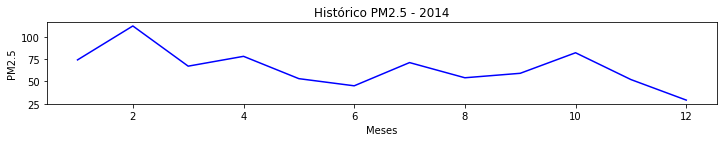

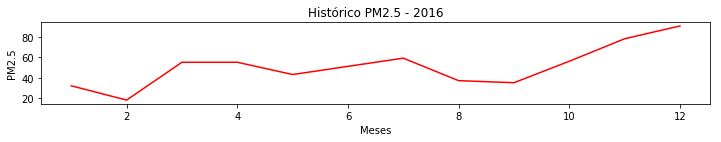

In [18]:
# Comparativo de PM2.5 em 2014 e 2016, por mês
# Em 2014, Maior pico em Fevereiro e menor em Dezembro
# Em 2016, Maior pico em Dezembro e menor em Fevereiro

df_2014_pm25 = df_2014[['month', 'PM2.5']].groupby(['month']).median()
fig,ax1 = plt.subplots(figsize=(12,1.5))
ax1.plot(df_2014_pm25, color = 'blue')

ax1.set_title('Histórico PM2.5 - 2014')
ax1.set_xlabel('Meses')
ax1.set_ylabel('PM2.5')

df_2016_pm25 = df_2016[['month', 'PM2.5']].groupby(['month']).median()
fig,ax1 = plt.subplots(figsize=(12,1.5))
ax1.plot(df_2016_pm25, color = 'red')

ax1.set_title('Histórico PM2.5 - 2016')
ax1.set_xlabel('Meses')
ax1.set_ylabel('PM2.5')

plt.show()

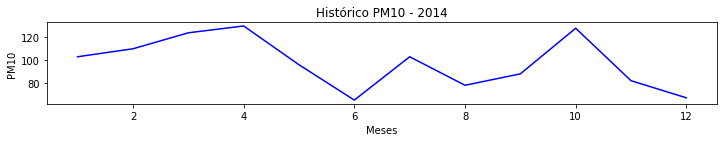

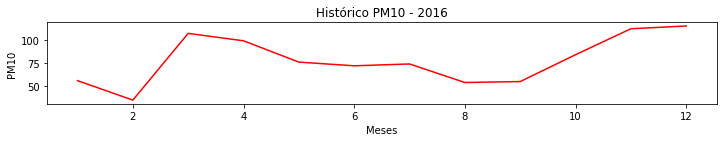

In [19]:
# Comparativo de PM10 em 2014 e 2016, por mês
# Em 2014, maiores valores foram em Abril e Outubro e menores em Junho e Dezembro
# Em 2016, maiores valores foram em Novembro e Dezembro e menores em Janeiro e Fevereiro

df_2014_pm10 = df_2014[['month', 'PM10']].groupby(['month']).median()
fig,ax1 = plt.subplots(figsize=(12,1.5))
ax1.plot(df_2014_pm10, color = 'blue')

ax1.set_title('Histórico PM10 - 2014')
ax1.set_xlabel('Meses')
ax1.set_ylabel('PM10')

df_2016_pm10 = df_2016[['month', 'PM10']].groupby(['month']).median()
fig,ax1 = plt.subplots(figsize=(12,1.5))
ax1.plot(df_2016_pm10, color = 'red')

ax1.set_title('Histórico PM10 - 2016')
ax1.set_xlabel('Meses')
ax1.set_ylabel('PM10')

plt.show()

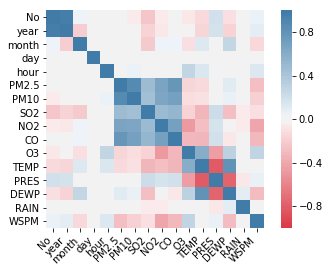

In [22]:
#Mapa de calor, identificando a correlacao entre variáveis
corr = dframe_copy.corr()
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(10,600, n= 200),
 
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

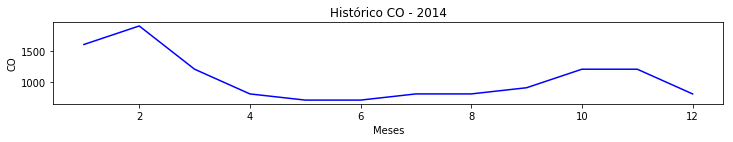

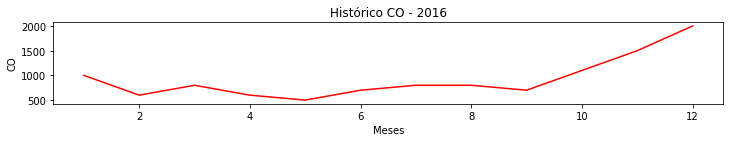

In [23]:
# Comparativo de CO em 2014 e 2016, por mês
df_2014_co = df_2014[['month', 'CO']].groupby(['month']).median()
fig,ax1 = plt.subplots(figsize=(12,1.5))
ax1.plot(df_2014_co, color = 'blue')

ax1.set_title('Histórico CO - 2014')
ax1.set_xlabel('Meses')
ax1.set_ylabel('CO')

df_2016_co = df_2016[['month', 'CO']].groupby(['month']).median()
fig,ax1 = plt.subplots(figsize=(12,1.5))
ax1.plot(df_2016_co, color = 'red')

ax1.set_title('Histórico CO - 2016')
ax1.set_xlabel('Meses')
ax1.set_ylabel('CO')

plt.show()

### Apresentação dos resultados

In [ ]:
# Partículas PM2.5, PM10, SO2, NO2, CO apresentam correlação positiva.
# SO2, NO2, CO são gases tóxicos e tem grande parte de sua produção pela atividade industrial.
# Ano de 2014, maiores níveis de emissões de partículas foram no começo do ano.
# Já em 2016, maiores níveis de emossões de particulas foram no final do ano.